In [1]:
from obspy import read
import matplotlib.pyplot as plt
import time

In [26]:
stream=read("miniSEED_files/34469021_2023-03-26T11.53.56.208769Z_WS.POZA.S3.DN2.MSEED")
start_time = time.time()


In [5]:
print(stream[0].stats)


         network: WS
         station: POZA
        location: S4
         channel: DN2
       starttime: 2023-06-09T22:34:36.211277Z
         endtime: 2023-06-09T22:36:16.211277Z
   sampling_rate: 250.0
           delta: 0.004
            npts: 25001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 447, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 228864})


In [6]:
for k, v in sorted(stream[0].stats.mseed.items()):
    print("'%s': %s" % (k, str(v))) 

'byteorder': >
'dataquality': D
'encoding': FLOAT64
'filesize': 228864
'number_of_records': 447
'record_length': 512


In [ ]:
# Select the trace to process
trace = stream[0]

# Apply a bandpass filter (e.g., 0.5–5 Hz)
lowcut = 0.1 # Lower frequency (Hz)
highcut = 15.0  # Upper frequency (Hz)
trace_filtered = trace.copy()
trace_filtered.filter("bandpass", freqmin=lowcut, freqmax=highcut)
# Record the end time for filtering
filter_end_time = time.time()


# Plot the original and filtered data
plt.figure(figsize=(12, 8))
plt.plot(trace.times(), trace.data, label="Original Signal", alpha=0.7)
plt.plot(trace_filtered.times(), trace_filtered.data, label="Filtered Signal (5-30 Hz)", linewidth=2)
plt.title(f"Range Frequency Filter on Trace {trace.id}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()
# Record the end time for plotting
plot_end_time = time.time()
# Function to format time dynamically (milliseconds if less than 1 second)
def format_time(elapsed):
    if elapsed < 1.0:
        return f"{elapsed * 1000:.2f} ms"  # Convert seconds to milliseconds
    return f"{elapsed:.3f} seconds"  # Show seconds for larger durations

# Print timing information
print(f"Plot started at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")
print(f"Time taken to apply the filter: {format_time(filter_end_time - start_time)}")
print(f"Time taken to plot the graph: {format_time(plot_end_time - filter_end_time)}")
print(f"Total time elapsed: {format_time(plot_end_time - start_time)}")


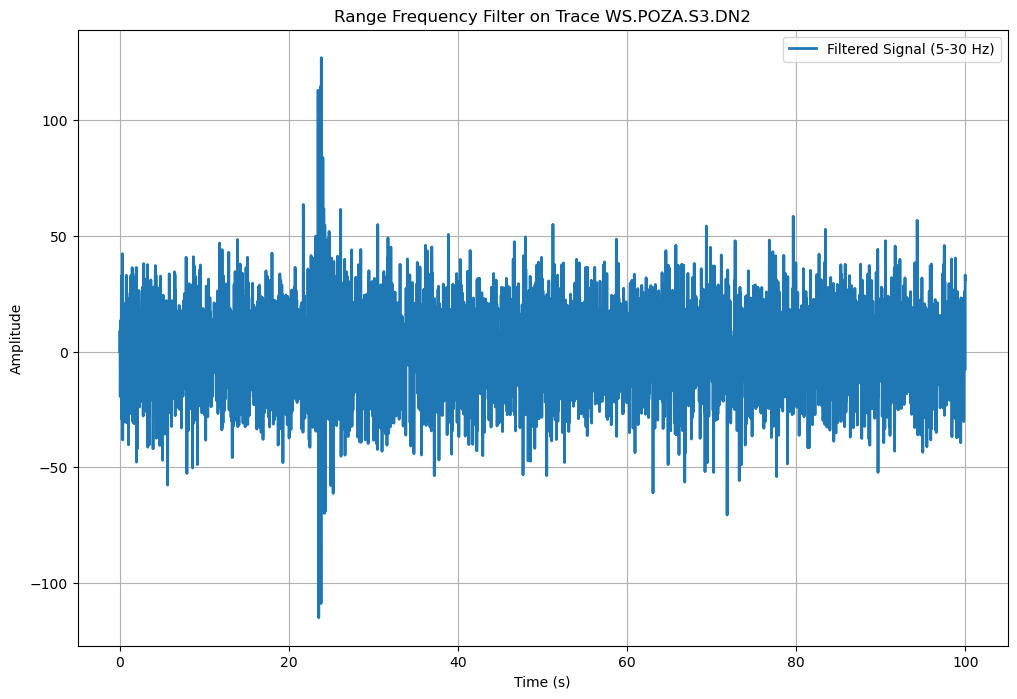

Plot started at: 2025-01-27 14:56:48
Time taken to apply the filter: 2.00 ms
Time taken to plot the graph: 104.00 ms
Total time elapsed: 106.00 ms


In [31]:
# Select the trace to process
trace = stream[0]

# Record the start time
start_time = time.time()

# Apply a bandpass filter (e.g., 0.5–5 Hz)
lowcut = 0.5  # Lower frequency (Hz)
highcut = 20.0  # Upper frequency (Hz)
trace_filtered = trace.copy()
trace_filtered.filter("bandpass", freqmin=lowcut, freqmax=highcut)

# Record the end time for filtering
filter_end_time = time.time()

# Plot the original and filtered data
plt.figure(figsize=(12, 8))
# plt.plot(trace.times(), trace.data, label="Original Signal", alpha=0.7)
plt.plot(trace_filtered.times(), trace_filtered.data, label="Filtered Signal (5-30 Hz)", linewidth=2)
plt.title(f"Range Frequency Filter on Trace {trace.id}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# Record the end time for plotting
plot_end_time = time.time()

# Function to format time dynamically (milliseconds if less than 1 second)
def format_time(elapsed):
    if elapsed < 1.0:
        return f"{elapsed * 1000:.2f} ms"  # Convert seconds to milliseconds
    return f"{elapsed:.3f} seconds"  # Show seconds for larger durations

# Print timing information
print(f"Plot started at: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")
print(f"Time taken to apply the filter: {format_time(filter_end_time - start_time)}")
print(f"Time taken to plot the graph: {format_time(plot_end_time - filter_end_time)}")
print(f"Total time elapsed: {format_time(plot_end_time - start_time)}")
